In [1]:
import sklearn.datasets as datasets
from sklearn.ensemble import AdaBoostClassifier, svc

# Load the iris dataset
iris = datasets.load_iris()



AdaBoostClassifier(n_estimators=100)

In [19]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear')

# Create an adaboost classifier
clf = AdaBoostClassifier(n_estimators=50, estimator = svc, learning_rate=1, algorithm="SAMME")

# Fit the classifier to the data
clf.fit(X_train, y_train)


# Make predictions
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [15]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NB = GaussianNB()

# Create an adaboost classifier
clf = AdaBoostClassifier(n_estimators=50, estimator = NB, learning_rate=1, algorithm="SAMME")

# Fit the classifier to the data
clf.fit(X_train, y_train)


# Make predictions
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [27]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier ()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(" Accuracy: %.3f (%.3f) " % (mean(n_scores), std(n_scores)))

 Accuracy: 0.806 (0.041) 


In [34]:
# make predictions using adaboost for classification
from sklearn. datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
row_index = 5  # You can choose any row index here
row = X[row_index].reshape(1, -1)
# fit the model on the whole dataset
model.fit(X, y)

yhat = model.predict(row)
print( 'Predicted Class: %d' % yhat [0])

Predicted Class: 1


In [37]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an adaboost classifier
clf = AdaBoostClassifier(n_estimators=50, estimator = LogisticRegression(), learning_rate=1)

# Fit the classifier to the data
clf.fit(X_train, y_train)


# Make predictions
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

# Define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)

# Define the model
model = AdaBoostRegressor()

# Define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Report performance
print("Mean Absolute Error: %.3f (%.3f)" % (mean(scores), std(scores)))


Mean Absolute Error: -73.239 (6.214)


>1 0.802 (0.030)
>2 0.867 (0.031)
>3 0.874 (0.036)
>4 0.894 (0.033)
>5 0.913 (0.025)
>6 0.923 (0.021)
>7 0.929 (0.027)
>8 0.931 (0.020)
>9 0.937 (0.027)
>10 0.930 (0.028)


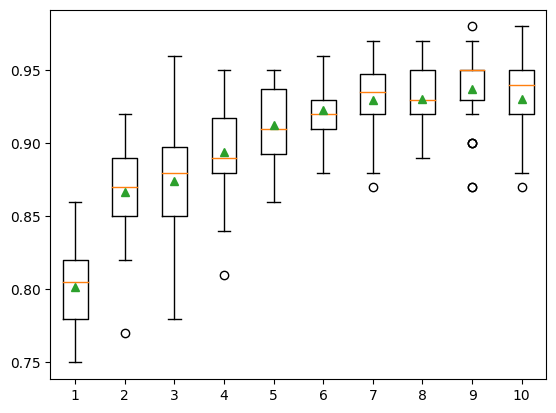

In [60]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# define dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
  return X ,y
# define the model
def get_models():
  models = dict()
  for i in range(1,11):
    base = DecisionTreeClassifier(max_depth=i)
    models[str(i)] = AdaBoostClassifier(estimator=base)
  return models

# evaluate the model
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

X, y = get_dataset()
models = get_models()
results, names = list(),list()

for name,model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))

plt.boxplot(results,labels=names,showmeans=True)
plt.show()


>0.100 0.763 (0.036)
>0.200 0.783 (0.031)
>0.300 0.800 (0.034)
>0.400 0.800 (0.030)
>0.500 0.807 (0.027)
>0.600 0.799 (0.030)
>0.700 0.804 (0.030)
>0.800 0.804 (0.033)
>0.900 0.798 (0.035)
>1.000 0.802 (0.030)
>1.100 0.805 (0.030)
>1.200 0.802 (0.035)
>1.300 0.799 (0.033)
>1.400 0.791 (0.033)
>1.500 0.790 (0.027)
>1.600 0.778 (0.030)
>1.700 0.775 (0.040)
>1.800 0.747 (0.043)
>1.900 0.747 (0.034)
>2.000 0.685 (0.039)


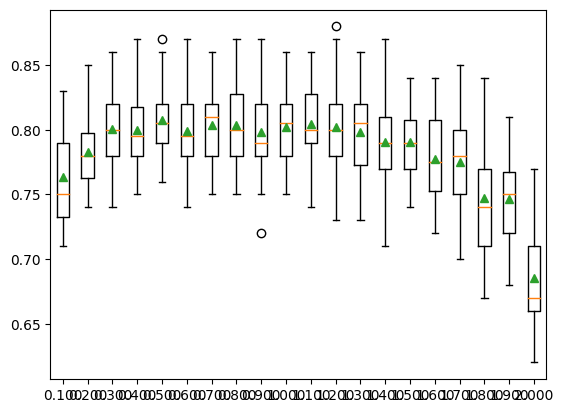

In [64]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# define dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
    return X, y

# define the model
def get_models():
    models = dict()
    for i in range(1, 21):
        key = '%.3f' % (i / 10)
        models[key] = AdaBoostClassifier(learning_rate=i / 10)
    return models

# evaluate the model
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()
